In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(r"C:/Users/DELL/Desktop/data/ML/car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df['price_reduced']= df['Present_Price']-df['Selling_Price']
df['price_reduced_ratio']= round (df['price_reduced'] / df['Selling_Price'],2)
df['year_used']= 2023 - df['Year']

In [8]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,price_reduced,price_reduced_ratio,year_used
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24,0.67,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79,1.01,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60,0.36,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30,0.46,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27,0.49,9


In [9]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [10]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [11]:
fuel_status = pd.get_dummies(df['Fuel_Type'],drop_first = True)
trans_status =  pd.get_dummies(df['Transmission'],drop_first = True)

In [12]:
df = pd.concat([df,fuel_status,trans_status],axis =1)

In [13]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,price_reduced,price_reduced_ratio,year_used,Diesel,Petrol,Manual
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24,0.67,9,0,1,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79,1.01,10,1,0,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60,0.36,6,0,1,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30,0.46,12,0,1,1
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27,0.49,9,1,0,1


In [14]:
df.drop(['Car_Name','Year','Fuel_Type','Seller_Type','Transmission','Owner'], axis=1 , inplace = True)

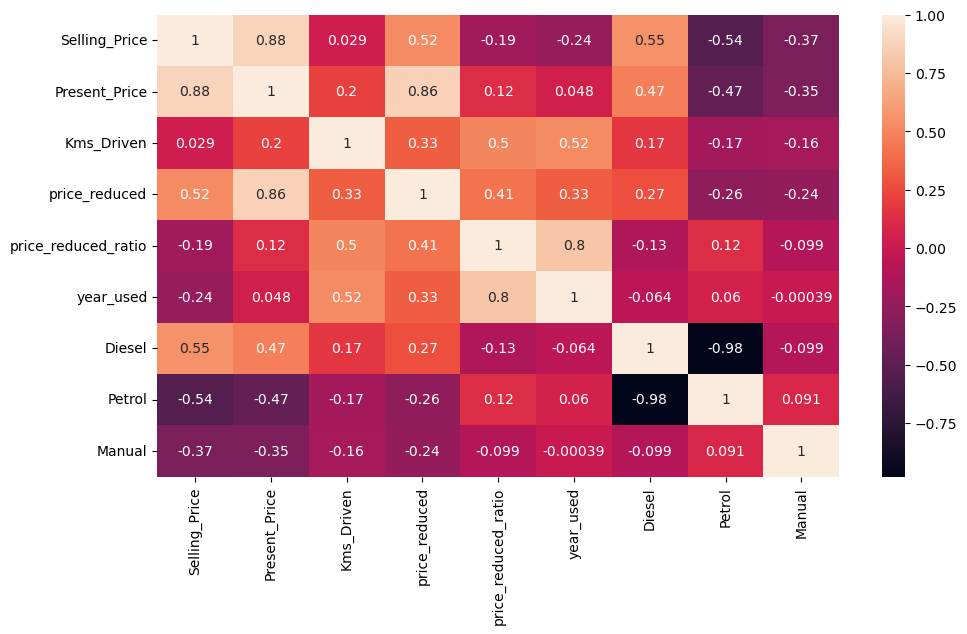

In [15]:
plt.figure(figsize=(11,6))
sns.heatmap(df.corr(),cmap='rocket',annot=True)
plt.show()

In [16]:
X = df.drop(['Selling_Price'],axis=1)
y = df['Selling_Price']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# model 1


In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train , X_train_sm).fit()

In [ ]:
lr.params

In [ ]:
print(lr.summary())

# model 2


In [18]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [19]:
LinearRegression()

LinearRegression()

In [20]:
print(lm.intercept_)
print(lm.coef_)

7.638334409421077e-14
[ 1.00000000e+00 -2.25555552e-18 -1.00000000e+00  3.18657993e-16
  8.28730965e-16  5.91494537e-16 -1.33358593e-16 -1.26077336e-15]


In [21]:
y_pred = lm.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r_squared = r2_score(y_test , y_pred)

In [23]:
r_squared

1.0